In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
# Load Dataset
df = pd.read_csv(r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD.csv')
print(df.head())
print(df.info())

   Year     Month     Region Home Size Purchase Completion  \
0  2022  December    Midwest    Double                  No   
1  2022  December    Midwest   Single                   No   
2  2022  December    Midwest    Total1                  No   
3  2022  December  Northeast    Double                  No   
4  2022  December  Northeast   Single                   No   

   Average Sales Price  Number of Households (Thousands)  \
0               144300                             28280   
1                82300                             28280   
2               104700                             28280   
3               158300                             22630   
4                75300                             22630   

   Median Income - Current Dollars  Median Income - 2022 Dollars  \
0                            73070                         73070   
1                            73070                         73070   
2                            73070                         730

In [12]:
#2. Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values for numerical and categorical columns
for col in df.columns:
    if df[col].dtype == "object":  # Categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical
        df[col].fillna(df[col].median(), inplace=True)

print("After Handling Missing Values:\n", df.isnull().sum())

Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
Income_Ratio                        0
dtype: int64
After Handling Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
Income_Ratio                        0
dtype: int64


In [23]:
# Label encode categorical features and add a new feature:
# Encode categorical features
categorical_cols = ['Year', 'Month', 'Region', 'Home Size']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create a new feature: Income Ratio
df['Income_Ratio'] = df['Median Income - Current Dollars'] / df['Mean Income - Current Dollars']
print("\nNew Feature 'Income_Ratio' Added:\n", df[['Income_Ratio']].head())


New Feature 'Income_Ratio' Added:
    Income_Ratio
0      0.713574
1      0.713574
2      0.713574
3      0.696964
4      0.696964


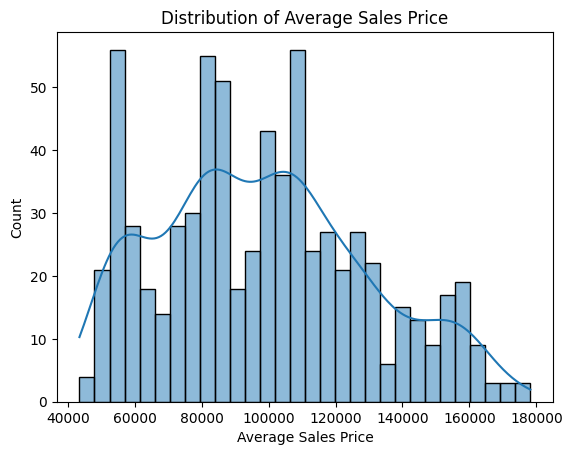

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_5758/1503013309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


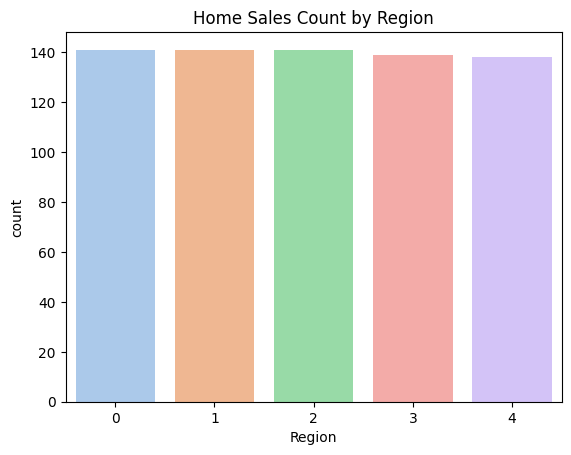

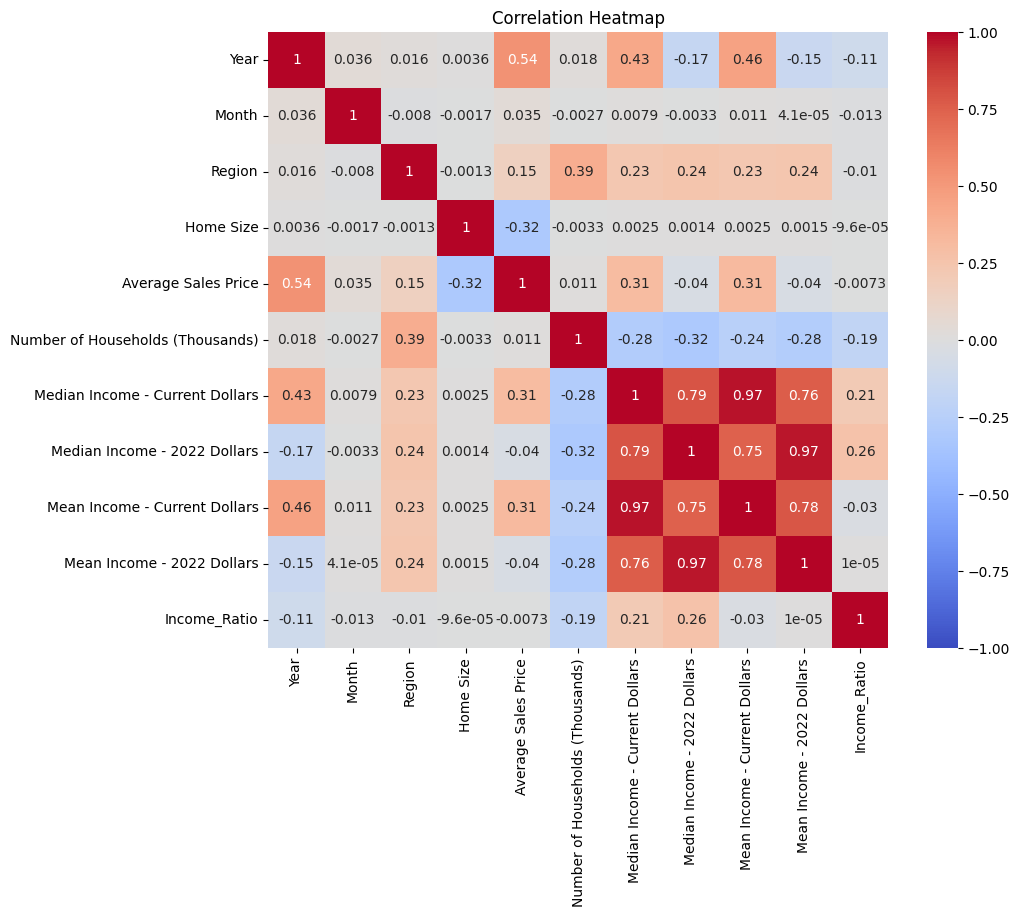

In [24]:
# Visualization:
# Univariate Analysis
sns.histplot(df['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.show()

# Bivariate Analysis
sns.countplot(x='Region', data=df, palette='pastel')
plt.title('Home Sales Count by Region')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
#3.Train-Test Split
#Prepare features and target for the model:
X = df.drop(columns=['Purchase Completion'])  # Features
y = df['Purchase Completion']  # Target

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

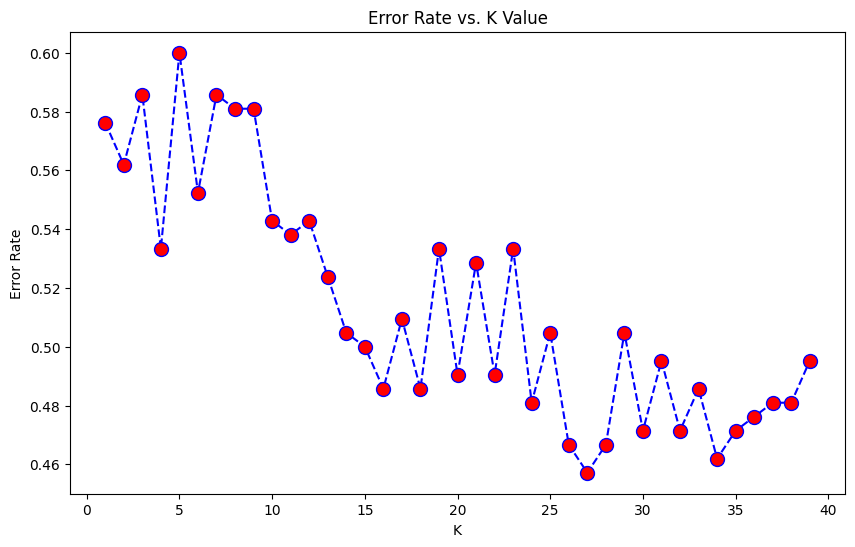

Optimal K: 27


In [27]:
#4.Find Optimal K using Elbow Method
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Optimal K
optimal_k = error_rate.index(min(error_rate)) + 1
print("Optimal K:", optimal_k)

In [28]:
### 5. **Cross-Validation on K**
# To validate the model's performance and ensure generalizability, 
#we perform 10-fold cross-validation with the optimal *K*.
knn_cv = KNeighborsClassifier(n_neighbors=optimal_k)
cross_val_scores = cross_val_score(knn_cv, X, y, cv=10, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cross_val_scores.std())

NameError: name 'cross_val_score' is not defined

In [22]:
# 7.Model Evaluation
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", knn.score(X_test, y_test))

Confusion Matrix:
 [[95 20]
 [76 19]]
Classification Report:
               precision    recall  f1-score   support

          No       0.56      0.83      0.66       115
         Yes       0.49      0.20      0.28        95

    accuracy                           0.54       210
   macro avg       0.52      0.51      0.47       210
weighted avg       0.52      0.54      0.49       210

Accuracy: 0.5428571428571428


In [31]:
# 6.Model Training and Prediction
# Train the model with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict test set
y_pred = knn.predict(X_test)